<div style="border: 10px solid blue; padding: 20px; font-family: Arial, sans-serif; text-align: center;">

# *RÉPUBLIQUE DU SÉNÉGAL*      
<div style="text-align: center;">
    <h3>Un peuple - un But - une Foi</h3>
</div>

<img src="Republique_du_Senegal.jpg" alt="Logo République du Sénégal" style="width: 100px; margin-top: 10px;">

---

## *Agence Nationale de la Statistique et de la Démographie*  
<img src="ANSD.jpg" alt="Logo ANSD" style="width: 120px; margin-top: 10px;">  

### *École Nationale de la Statistique et de l'Analyse Économique Pierre Ndiaye*  
<img src="ENSAE-Dakar-logo.jpg" alt="Logo ENSAE" style="width: 120px; margin-top: 10px;">

---

<div style="background-color: blue; color: white; text-align: center; padding: 10px; font-weight: bold; display: inline-block;">
Projet de Machine Learning 2
</div>

<div style="text-align: center;">
    <h3>Sujet :</h3>
</div>
    
    
---
    
## *Churn Score*  

---

<div style="text-align: center;">
    <h3>Rédigé par :</h3>
    <p style="font-size: 20px; text-align: center;">
        FAMARA SADIO<br>
        AMADOU YOUM<br>
        SARAN NDIAYE<br>
        Sié Rachid TRAORE
    </p>
</div>

---

<div style="text-align: center;">
    <h3>Sous la supervision de :</h3>
    <p style="font-size: 20px; text-align: center;">
        MOUSLY DIAW<br>
        Data scientist / ML Engineer / Auto-Entrepreneur
    </p>
</div>
    
---

    © ISE2_Mai 2025
    
</div>

# <font color='blue'> 1. Importations des librairies </font>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.metrics import fbeta_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from hyperopt.pyll.base import scope
from sklearn.svm import SVC
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             roc_auc_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             mean_absolute_error,
                             precision_score, recall_score, f1_score, roc_curve,
                             auc, precision_recall_curve, average_precision_score
                            )
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTEENN, SMOTETomek

# store elements as dictionary keys and their counts as dictionary values
from collections import Counter


from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

# Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE


# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# store elements as dictionary keys and their counts as dictionary values
from collections import Counter

# Data Source

# Exploratory Analysis

### Chargement des données

In [21]:
# Importation de la base de données train
df = pd.read_csv('../data/cleaned data/train_df.csv')

In [22]:
df.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [23]:
df.CustomerId.nunique()

23221

In [24]:
df.duplicated().sum()

0

In [25]:
abt = df.drop(['Surname', 'id', 'CustomerId'], axis=1)
abt.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


# Séparation des données (train et test) et pré-processing

y pour la varibale cible

X pour les features

In [26]:
# Variable cible
y = abt.Exited

# Features
X = abt.drop(['Exited'], axis=1)

print(X.shape, y.shape)

(165034, 10) (165034,)


In [27]:
# Liste des features numériques
num_columns = X.select_dtypes(include='number').columns.tolist()
num_columns

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [28]:
# Liste features catégorielles
cat_columns = X.select_dtypes(include='object').columns.tolist()
cat_columns

['Geography', 'Gender']

In [29]:
def class_count(a):
    counter=Counter(a)
    kv=[list(counter.keys()),list(counter.values())]
    abt2 = pd.DataFrame(np.array(kv).T, columns=['Exited','Count'])
    abt2['Count'] = abt2['Count'].astype('int64')
    abt2['%'] = round(abt2['Count'] / a.shape[0] * 100, 2)
    return abt2.sort_values('Count',ascending=False)

In [30]:
class_count(y)

,Exited,Count,%
0,0,130113,78.84
1,1,34921,21.16


## Create a Train Test Split


30% pour le test

70% pour le training

In [31]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=abt.Exited)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

115523 49511 115523 49511


In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115523 entries, 113186 to 75738
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      115523 non-null  int64  
 1   Geography        115523 non-null  object 
 2   Gender           115523 non-null  object 
 3   Age              115523 non-null  float64
 4   Tenure           115523 non-null  int64  
 5   Balance          115523 non-null  float64
 6   NumOfProducts    115523 non-null  int64  
 7   HasCrCard        115523 non-null  float64
 8   IsActiveMember   115523 non-null  float64
 9   EstimatedSalary  115523 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 9.7+ MB


## Pre-processing Pipeline

Construction d'un pipeline de prétraitement à partir des transformateurs de donnés: StandardCaler et OneHotencoder

In [33]:
num_features = []

for i in num_columns:
    location = X.columns.get_loc(i)
    num_features.append(location)
print(num_features)

[0, 3, 4, 5, 6, 7, 8, 9]


In [34]:
cat_features = []

for i in cat_columns:
    location = X.columns.get_loc(i)
    cat_features.append(location)
print(cat_features)

[1, 2]


In [35]:
# Pipeline de préprocessing
preprocess = make_column_transformer(
    (StandardScaler(), num_features),
    (OneHotEncoder(sparse_output=False), cat_features)
)
preprocess

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 [0, 3, 4, 5, 6, 7, 8, 9]),
                                ('onehotencoder',
                                 OneHotEncoder(sparse_output=False), [1, 2])])

# Entrainement des modèles

## Regression logistique

In [21]:
# Pipeline par type de re-sampling
resampling_methods = {
    'over': ImbPipeline([
        ('preprocess', preprocess),
        ('smote', SMOTE(random_state=42)),
        ('logisticRegression', LogisticRegression())
    ]),
    'under': ImbPipeline([
        ('preprocess', preprocess),
        ('under', RandomUnderSampler(random_state=42)),
        ('logisticRegression', LogisticRegression())
    ])
    
}

### Optimisation des hyperparamètres

In [22]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

# Définir l'espace des hyperparamètres pour logistic
space = {
    #'logisticRegression__penalty': hp.choice('logisticRegression__penalty', [None, 'l2']),
    'logisticRegression__C': hp.loguniform('logisticRegression__C', -4, 2),
    'logisticRegression__solver': hp.choice('logisticRegression__solver', ['lbfgs', 'sag', 'saga']),
}
best_params_dict = {}

# Définir la fonction objectif pour évaluer les performances du modèle
for method, pipeline in resampling_methods.items():
# Définir la fonction objectif pour Hyperopt
    def objective(params):
        pipeline.set_params(**params)
        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        return -accuracy

    # Utiliser Hyperopt pour la recherche d'hyperparamètres
    trials = Trials()
    best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
    # Afficher les meilleurs hyperparamètres
    best_params_dict[method] = best

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

  4%|▍         | 2/50 [00:37<15:57, 19.94s/trial, best loss: -0.7558724323887621]

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  8%|▊         | 4/50 [01:15<15:19, 19.99s/trial, best loss: -0.7558724323887621]

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 16%|█▌        | 8/50 [02:11<11:56, 17.05s/trial, best loss: -0.7558926299206237]

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 18%|█▊        | 9/50 [02:40<14:20, 20.98s/trial, best loss: -0.7558926299206237]

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 20%|██        | 10/50 [03:05<14:49, 22.23s/trial, best loss: -0.7558926299206237]

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 22%|██▏       | 11/50 [03:35<15:57, 24.56s/trial, best loss: -0.7558926299206237]

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 36%|███▌      | 18/50 [05:16<09:17, 17.42s/trial, best loss: -0.7558926299206237]

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 68%|██████▊   | 34/50 [07:57<03:34, 13.41s/trial, best loss: -0.7559128274524853]

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 80%|████████  | 40/50 [09:06<02:26, 14.62s/trial, best loss: -0.7559128274524853]

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  6%|▌         | 3/50 [00:06<01:49,  2.32s/trial, best loss: -0.7532871483104765]

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



  8%|▊         | 4/50 [00:10<02:18,  3.02s/trial, best loss: -0.7532871483104765]

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 16%|█▌        | 8/50 [00:17<01:33,  2.22s/trial, best loss: -0.7532871483104765]

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 20%|██        | 10/50 [00:22<01:40,  2.52s/trial, best loss: -0.7532871483104765]

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 28%|██▊       | 14/50 [00:27<01:08,  1.89s/trial, best loss: -0.7532871483104765]

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 36%|███▌      | 18/50 [00:35<01:16,  2.38s/trial, best loss: -0.7532871483104765]

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 64%|██████▍   | 32/50 [00:50<00:26,  1.49s/trial, best loss: -0.7534487285653693]

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 84%|████████▍ | 42/50 [01:01<00:12,  1.60s/trial, best loss: -0.7534487285653693]

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



100%|██████████| 50/50 [01:06<00:00,  1.32s/trial, best loss: -0.7534487285653693]


In [23]:
pipelines = {
    'over': ImbPipeline([
        ('preprocess', preprocess),
        ('smote', SMOTE(random_state=42)),
        ('logisticRegression', LogisticRegression(
            #penalty=best_params_dict['over']['logisticRegression__penalty'],
            C=best_params_dict['over']['logisticRegression__C'],
            solver=['lbfgs', 'sag', 'saga'][best_params_dict['over']['logisticRegression__solver']]       
        ))
    ]),
    'under': ImbPipeline([
        ('preprocess', preprocess),
        ('under', RandomUnderSampler(random_state=42)),
        ('logisticRegression', LogisticRegression(
            #penalty=best_params_dict['under']['logisticRegression__penalty'],
            C=best_params_dict['under']['logisticRegression__C'],
            solver=['lbfgs', 'sag', 'saga'][best_params_dict['under']['logisticRegression__solver']]       
        ))
    ])
}


In [24]:
performance_metrics = {
    'model': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'fbeta': []
}

# Entraînement et évaluation des modèles
for name, pipeline in pipelines.items():
    # Entraînement du modèle
    pipeline.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = pipeline.predict(X_test)

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fbeta = fbeta_score(y_test, y_pred, beta=1.5)


    # Stocker les métriques
    performance_metrics['model'].append(name)
    performance_metrics['accuracy'].append(accuracy)
    performance_metrics['precision'].append(precision)
    performance_metrics['recall'].append(recall)
    performance_metrics['f1_score'].append(f1)
    performance_metrics['fbeta'].append(fbeta)


### Prediction sur le modèle final

In [25]:
# Comparer les métriques pour trouver le meilleur modèle
df_performance = pd.DataFrame(performance_metrics)
best_model_name = df_performance.loc[df_performance['fbeta'].idxmax()]['model']
best_model = pipelines[best_model_name]

#print('Meilleur modèle basé sur l\'accuracy:')
best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 6, 7, 8, 9]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  [1, 2])])),
                ('smote', SMOTE(random_state=42)),
                ('logisticRegression',
                 LogisticRegression(C=0.09344910312166756))])

In [26]:
# Prédictions avec le meilleur modèle
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]


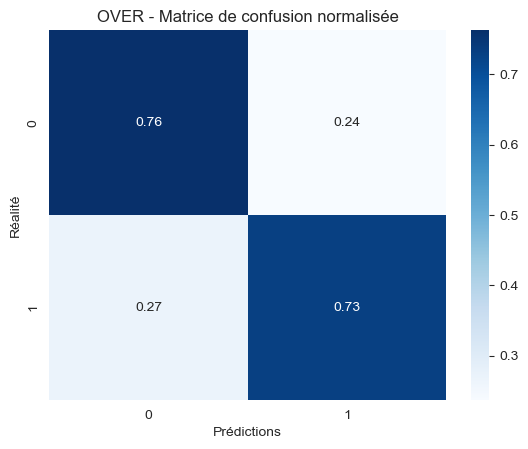

In [27]:
# Matrice de confusion normalisée
cm_normalized = confusion_matrix(y_test, y_pred_best, normalize='true')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title(f'{best_model_name.upper()} - Matrice de confusion normalisée')
plt.show()


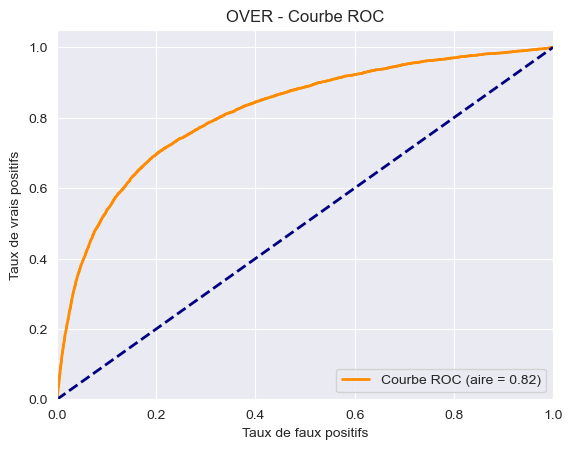

In [28]:
# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (aire = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f'{best_model_name.upper()} - Courbe ROC')
plt.legend(loc="lower right")
plt.show()


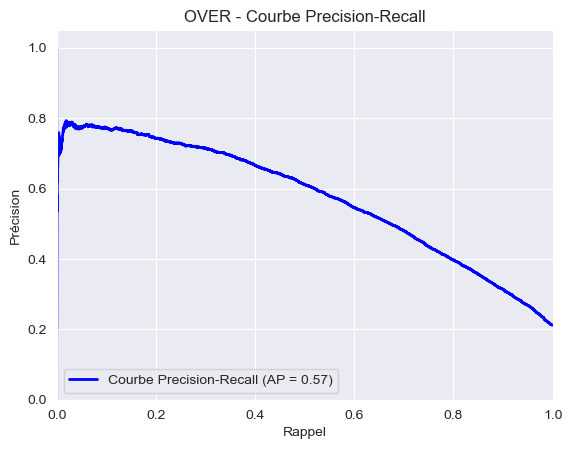

In [29]:
# Courbe Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob_best)
average_precision = average_precision_score(y_test, y_prob_best)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Courbe Precision-Recall (AP = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title(f'{best_model_name.upper()} - Courbe Precision-Recall')
plt.legend(loc="lower left")
plt.show()



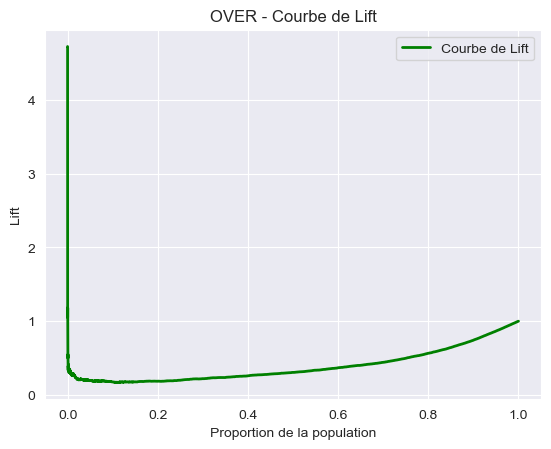

In [30]:
# Courbe de Lift
sorted_indices = np.argsort(y_prob_best)
sorted_y = y_test.iloc[sorted_indices]
cumulative_positive_rate = np.cumsum(sorted_y) / sum(sorted_y)
lift = cumulative_positive_rate / (np.arange(1, len(cumulative_positive_rate) + 1) / len(cumulative_positive_rate))
plt.figure()
plt.plot(np.arange(1, len(cumulative_positive_rate) + 1) / len(cumulative_positive_rate), lift, color='green', lw=2, label='Courbe de Lift')
plt.xlabel('Proportion de la population')
plt.ylabel('Lift')
plt.title(f'{best_model_name.upper()} - Courbe de Lift')
plt.legend(loc="upper right")
plt.show()

In [35]:
import pickle

# Spécifie le chemin du fichier (avec le bon séparateur)
filename = 'saved_models/logistic_regression.pkl'  # Utilise '/' au lieu de '\'

# Sauvegarde du modèle avec pickle
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)


In [37]:
filename = 'final_model/logistic_regression.pkl'  # Chemin vers le fichier

# Chargement du modèle
with open(filename, 'rb') as file:
    lr_model = pickle.load(file)

print(lr_model.score(X_test, y_test))

0.7559128274524853


In [38]:
# Let's use the first X_test record as new data
X_test[:1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
103886,624,Spain,Male,60.0,10,0.0,2,1.0,1.0,66795.78


In [39]:
pred_new = lr_model.predict(X_test[:1])

In [40]:
print(f"Predicted classes: {pred_new}")
print(f"Actual Labels: {list(y_test[:1])}")

Predicted classes: [1]
Actual Labels: [0]


In [44]:
test = pd.read_csv("../data/cleaned data/test.csv")
test.info(),
ttest = test.drop(['Surname', 'id', 'CustomerId'], axis=1)
ttest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 10 columns):
 #   Colum

In [45]:
## Prediction sur le jeu de test sans etiquette initiale
pred = lr_model.predict(ttest)
pred
pred.shape

(110023,)

In [46]:
import numpy as np
features_with_pred = np.hstack((ttest, pred.reshape(-1, 1)))

In [47]:
df = pd.DataFrame(features_with_pred, columns=list(ttest.columns) + ['Prediction'])


In [40]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Prediction
0,586,France,Female,23.0,2,0.0,2,0.0,1.0,160976.75,0
1,683,France,Female,46.0,2,0.0,1,1.0,0.0,72549.27,1
2,656,France,Female,34.0,7,0.0,2,1.0,0.0,138882.09,0
3,681,France,Male,36.0,8,0.0,1,1.0,0.0,113931.57,0
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.0,1
...,...,...,...,...,...,...,...,...,...,...,...
110018,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62,0
110019,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68,0
110020,712,France,Male,31.0,2,0.0,2,1.0,0.0,16287.38,0
110021,709,France,Female,32.0,3,0.0,1,1.0,1.0,158816.58,0


## Arbre de décision

In [48]:
# Pipeline par type de re-sampling
resampling_methods = {
    'over': ImbPipeline([
        ('preprocess', preprocess),
        ('smote', SMOTE(random_state=42)),
        ('DecisionTree', DecisionTreeClassifier())
    ]),
    'under': ImbPipeline([
        ('preprocess', preprocess),
        ('under', RandomUnderSampler(random_state=42)),
        ('DecisionTree', DecisionTreeClassifier())
    ]),
    'combined': ImbPipeline([
        ('preprocess', preprocess),
        ('smoteenn', SMOTEENN(random_state=42)),
        ('DecisionTree', DecisionTreeClassifier())
    ])
}

### Optimisation des hyperparamètres

In [49]:
space = {
    'DecisionTree__max_depth': hp.choice('DecisionTree__max_depth', [None, 5, 10, 20]),
    'DecisionTree__min_samples_split': hp.choice('DecisionTree__min_samples_split', [2, 5, 10]),
    'DecisionTree__min_samples_leaf': hp.choice('DecisionTree__min_samples_leaf', [1, 2, 4]),
    'DecisionTree__max_features': hp.choice('DecisionTree__max_features', [None, 'sqrt', 'log2']),
    'DecisionTree__criterion': hp.choice('DecisionTree__criterion', ['gini', 'entropy'])
}
best_params_dict = {}

# Définir la fonction objectif pour évaluer les performances du modèle
for method, pipeline in resampling_methods.items():
# Définir la fonction objectif pour Hyperopt
    def objective(params):
        pipeline.set_params(**params)
        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        return -accuracy

    # Utiliser Hyperopt pour la recherche d'hyperparamètres
    trials = Trials()
    best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
    # Afficher les meilleurs hyperparamètres
    best_params_dict[method] = best

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

 18%|█▊        | 9/50 [11:38<55:36, 81.39s/trial, best loss: -0.7998828543152027]  

: 

: 

In [43]:
# Création des pipelines avec les meilleurs hyperparamètres
pipelines = {
    'over': ImbPipeline([
        ('preprocess', preprocess),
        ('smote', SMOTE(random_state=42)),
        ('DecisionTree', DecisionTreeClassifier(
            max_depth=best_params_dict['over']['DecisionTree__max_depth'],
            min_samples_split=best_params_dict['over']['DecisionTree__min_samples_split'],
            min_samples_leaf=best_params_dict['over']['DecisionTree__min_samples_leaf'],
            max_features=[None, 'sqrt', 'log2'][best_params_dict['over']['DecisionTree__max_features']],
            criterion=['gini', 'entropy'][best_params_dict['over']['DecisionTree__criterion']]
        ))
    ]),
    'under': ImbPipeline([
        ('preprocess', preprocess),
        ('under', RandomUnderSampler(random_state=42)),
        ('DecisionTree', DecisionTreeClassifier(
            max_depth=best_params_dict['combined']['DecisionTree__max_depth'],
            min_samples_split=best_params_dict['combined']['DecisionTree__min_samples_split'],
            min_samples_leaf=best_params_dict['combined']['DecisionTree__min_samples_leaf'],
            max_features=[None, 'sqrt', 'log2'][best_params_dict['under']['DecisionTree__max_features']],
            criterion=['gini', 'entropy'][best_params_dict['under']['DecisionTree__criterion']]
        ))
    ]),
    'combined': ImbPipeline([
        ('preprocess', preprocess),
        ('smoteenn', SMOTEENN(random_state=42)),
        ('DecisionTree', DecisionTreeClassifier(
            max_depth=best_params_dict['combined']['DecisionTree__max_depth'],
            min_samples_split=best_params_dict['combined']['DecisionTree__min_samples_split'],
            min_samples_leaf=best_params_dict['combined']['DecisionTree__min_samples_leaf'],
            max_features=[None, 'sqrt', 'log2'][best_params_dict['combined']['DecisionTree__max_features']],
            criterion=['gini', 'entropy'][best_params_dict['combined']['DecisionTree__criterion']]
        ))
    ])
}

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

performance_metrics = {
    'model': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'fbeta': []
}

# Fonction pour sécuriser les paramètres
def safe_param(value, name):
    if name in ['min_samples_leaf', 'min_samples_split', 'max_depth'] and value == 0:
        return 1
    return value

# Entraînement et évaluation des modèles
for name, pipeline in pipelines.items():
    # Ajustement des hyperparamètres si nécessaire
    dt_step = pipeline.named_steps['DecisionTree']
    dt_step.set_params(
        max_depth=safe_param(dt_step.get_params()['max_depth'], 'max_depth'),
        min_samples_split=safe_param(dt_step.get_params()['min_samples_split'], 'min_samples_split'),
        min_samples_leaf=safe_param(dt_step.get_params()['min_samples_leaf'], 'min_samples_leaf'),
    )

    # Entraînement
    pipeline.fit(X_train, y_train)

    # Prédiction
    y_pred = pipeline.predict(X_test)

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    fbeta = fbeta_score(y_test, y_pred, beta=1.5, zero_division=0)

    # Stocker les résultats
    performance_metrics['model'].append(name)
    performance_metrics['accuracy'].append(accuracy)
    performance_metrics['precision'].append(precision)
    performance_metrics['recall'].append(recall)
    performance_metrics['f1_score'].append(f1)
    performance_metrics['fbeta'].append(fbeta)


### Prediction sur le modèle final

In [46]:
# Comparer les métriques pour trouver le meilleur modèle
df_performance = pd.DataFrame(performance_metrics)
best_model_name = df_performance.loc[df_performance['fbeta'].idxmax()]['model']
best_model = pipelines[best_model_name]

#print('Meilleur modèle basé sur l\'accuracy:')
best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 6, 7, 8, 9]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  [1, 2])])),
                ('smoteenn', SMOTEENN(random_state=42)),
                ('DecisionTree', DecisionTreeClassifier(max_depth=1))])

In [47]:
# Prédictions avec le meilleur modèle
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]


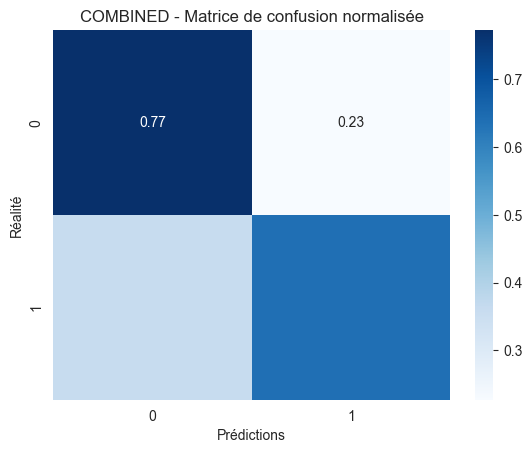

In [48]:
# Matrice de confusion normalisée
cm_normalized = confusion_matrix(y_test, y_pred_best, normalize='true')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title(f'{best_model_name.upper()} - Matrice de confusion normalisée')
plt.show()


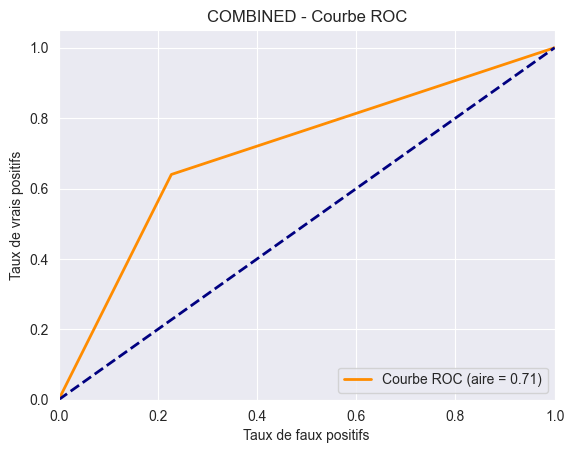

In [49]:
# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (aire = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f'{best_model_name.upper()} - Courbe ROC')
plt.legend(loc="lower right")
plt.show()


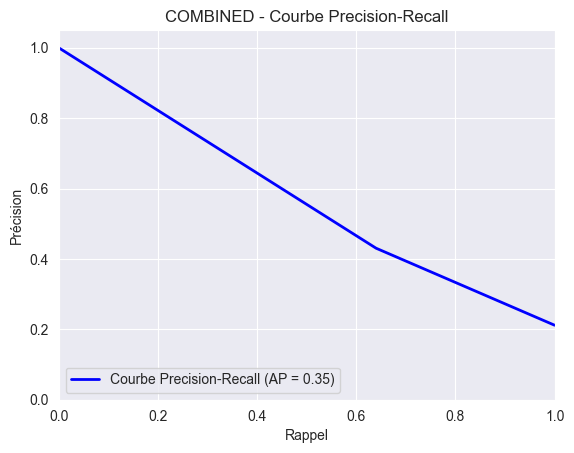

In [50]:
# Courbe Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob_best)
average_precision = average_precision_score(y_test, y_prob_best)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Courbe Precision-Recall (AP = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title(f'{best_model_name.upper()} - Courbe Precision-Recall')
plt.legend(loc="lower left")
plt.show()



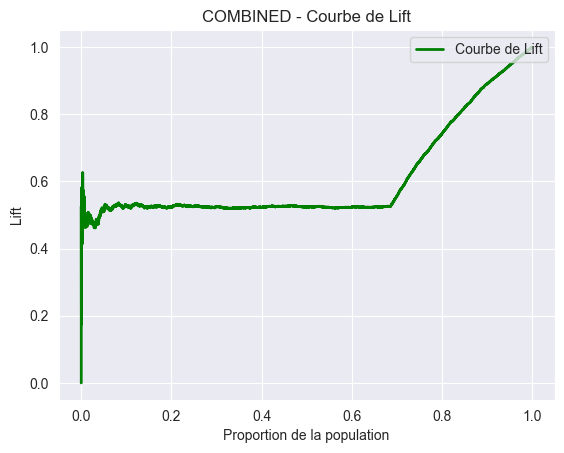

In [51]:
# Courbe de Lift
sorted_indices = np.argsort(y_prob_best)
sorted_y = y_test.iloc[sorted_indices]
cumulative_positive_rate = np.cumsum(sorted_y) / sum(sorted_y)
lift = cumulative_positive_rate / (np.arange(1, len(cumulative_positive_rate) + 1) / len(cumulative_positive_rate))
plt.figure()
plt.plot(np.arange(1, len(cumulative_positive_rate) + 1) / len(cumulative_positive_rate), lift, color='green', lw=2, label='Courbe de Lift')
plt.xlabel('Proportion de la population')
plt.ylabel('Lift')
plt.title(f'{best_model_name.upper()} - Courbe de Lift')
plt.legend(loc="upper right")
plt.show()

In [52]:
import joblib

filename = 'DT.sav'
joblib.dump(best_model, filename)

['DT.sav']

In [53]:
dt_model = joblib.load(filename)
print(dt_model.score(X_test, y_test))

0.7446628022055705


In [54]:
# Let's use the first X_test record as new data
X_test[:1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
103886,624,Spain,Male,60.0,10,0.0,2,1.0,1.0,66795.78


In [55]:
pred_new = dt_model.predict(X_test[:1])

In [56]:
print(f"Predicted classes: {pred_new}")
print(f"Actual Labels: {list(y_test[:1])}")

Predicted classes: [1]
Actual Labels: [0]


## Naive Bayes

In [57]:
# Pipeline par type de re-sampling
resampling_methods = {
    'over': ImbPipeline([
        ('preprocess', preprocess),
        ('smote', SMOTE(random_state=42)),
        ('NaiveBayes', GaussianNB())
    ]),
    'under': ImbPipeline([
        ('preprocess', preprocess),
        ('under', RandomUnderSampler(random_state=42)),
        ('NaiveBayes', GaussianNB())
    ]),
    'combined': ImbPipeline([
        ('preprocess', preprocess),
        ('smoteenn', SMOTEENN(random_state=42)),
        ('NaiveBayes', GaussianNB())
    ])
}

### Optimisation des hyperparamètres

In [58]:
space = { 'NaiveBayes__var_smoothing': hp.loguniform('NaiveBayes__var_smoothing', -10, 0)}


best_params_dict = {}

# Définir la fonction objectif pour évaluer les performances du modèle
for method, pipeline in resampling_methods.items():
# Définir la fonction objectif pour Hyperopt
    def objective(params):
        pipeline.set_params(**params)
        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        return -accuracy

    # Utiliser Hyperopt pour la recherche d'hyperparamètres
    trials = Trials()
    best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
    # Afficher les meilleurs hyperparamètres
    best_params_dict[method] = best

100%|███████████████████████████████████████████████| 50/50 [43:46<00:00, 52.52s/trial, best loss: -0.7236775666013613]


In [59]:
# Création des pipelines avec les meilleurs hyperparamètres
pipelines = {
    'over': ImbPipeline([
        ('preprocess', preprocess),
        ('smote', SMOTE(random_state=42)),
        ('NaiveBayes', GaussianNB(
            var_smoothing=best_params_dict['over']['NaiveBayes__var_smoothing']
        ))
    ]),
    'under': ImbPipeline([
        ('preprocess', preprocess),
        ('under', RandomUnderSampler(random_state=42)),
        ('NaiveBayes', GaussianNB(
            var_smoothing=best_params_dict['under']['NaiveBayes__var_smoothing']
        ))
    ]),
    'combined': ImbPipeline([
        ('preprocess', preprocess),
        ('smoteenn', SMOTEENN(random_state=42)),
        ('NaiveBayes', GaussianNB(
            var_smoothing=best_params_dict['combined']['NaiveBayes__var_smoothing']
        ))
    ])
}

In [60]:
performance_metrics = {
    'model': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'fbeta': []
}

# Entraînement et évaluation des modèles
for name, pipeline in pipelines.items():
    # Entraînement du modèle
    pipeline.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = pipeline.predict(X_test)

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fbeta = fbeta_score(y_test, y_pred, beta=1.5)


    # Stocker les métriques
    performance_metrics['model'].append(name)
    performance_metrics['accuracy'].append(accuracy)
    performance_metrics['precision'].append(precision)
    performance_metrics['recall'].append(recall)
    performance_metrics['f1_score'].append(f1)
    performance_metrics['fbeta'].append(fbeta)



### Prediction sur le modèle final

In [61]:
# Comparer les métriques pour trouver le meilleur modèle
df_performance = pd.DataFrame(performance_metrics)
best_model_name = df_performance.loc[df_performance['fbeta'].idxmax()]['model']
best_model = pipelines[best_model_name]

#print('Meilleur modèle basé sur l\'accuracy:')
best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 6, 7, 8, 9]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  [1, 2])])),
                ('smoteenn', SMOTEENN(random_state=42)),
                ('NaiveBayes', GaussianNB(var_smoothing=0.31608502005972233))])

In [62]:
# Prédictions avec le meilleur modèle
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]


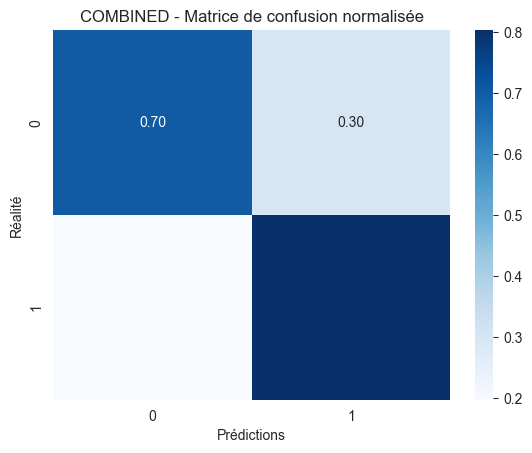

In [63]:
# Matrice de confusion normalisée
cm_normalized = confusion_matrix(y_test, y_pred_best, normalize='true')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title(f'{best_model_name.upper()} - Matrice de confusion normalisée')
plt.show()


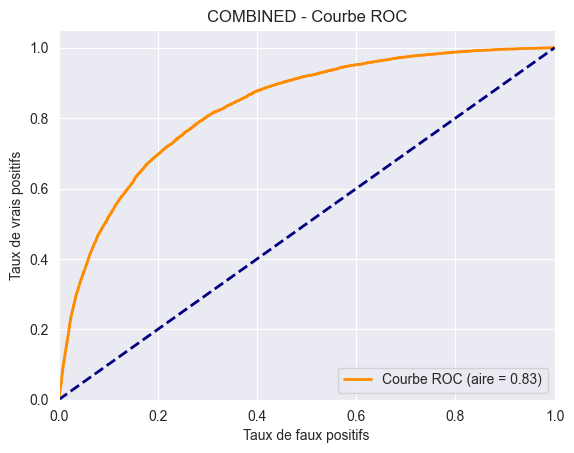

In [64]:
# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (aire = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f'{best_model_name.upper()} - Courbe ROC')
plt.legend(loc="lower right")
plt.show()


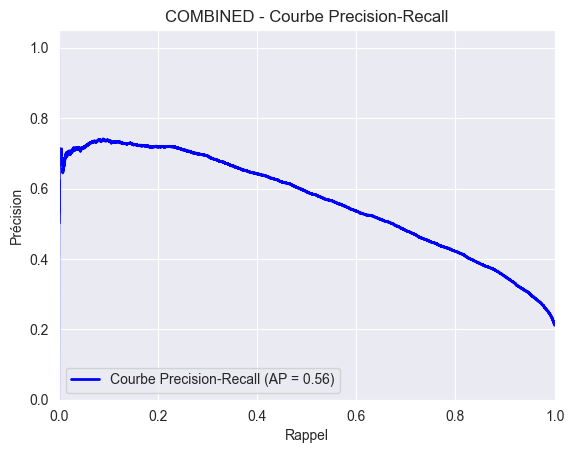

In [65]:
# Courbe Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob_best)
average_precision = average_precision_score(y_test, y_prob_best)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Courbe Precision-Recall (AP = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title(f'{best_model_name.upper()} - Courbe Precision-Recall')
plt.legend(loc="lower left")
plt.show()



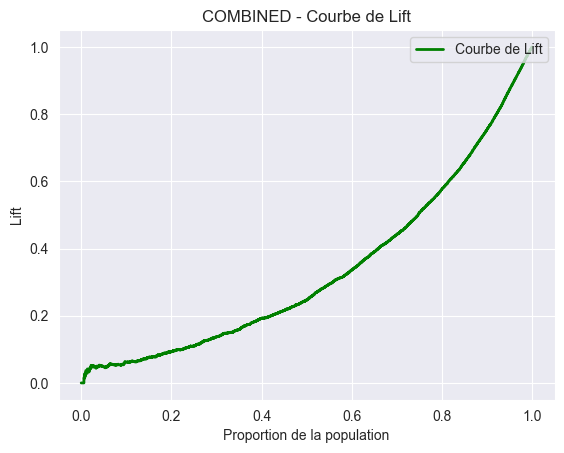

In [66]:
# Courbe de Lift
sorted_indices = np.argsort(y_prob_best)
sorted_y = y_test.iloc[sorted_indices]
cumulative_positive_rate = np.cumsum(sorted_y) / sum(sorted_y)
lift = cumulative_positive_rate / (np.arange(1, len(cumulative_positive_rate) + 1) / len(cumulative_positive_rate))
plt.figure()
plt.plot(np.arange(1, len(cumulative_positive_rate) + 1) / len(cumulative_positive_rate), lift, color='green', lw=2, label='Courbe de Lift')
plt.xlabel('Proportion de la population')
plt.ylabel('Lift')
plt.title(f'{best_model_name.upper()} - Courbe de Lift')
plt.legend(loc="upper right")
plt.show()

In [67]:
import joblib

filename = 'NB.sav'
joblib.dump(best_model, filename)

['NB.sav']

In [68]:
nb_model = joblib.load(filename)
print(nb_model.score(X_test, y_test))

0.7236775666013613


In [69]:
# Let's use the first X_test record as new data
X_test[:1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
103886,624,Spain,Male,60.0,10,0.0,2,1.0,1.0,66795.78


In [70]:
pred_new = nb_model.predict(X_test[:1])

In [71]:
print(f"Predicted classes: {pred_new}")
print(f"Actual Labels: {list(y_test[:1])}")

Predicted classes: [1]
Actual Labels: [0]


## Perceptron

In [72]:
# Pipeline par type de re-sampling
resampling_methods = {
    'over': ImbPipeline([
        ('preprocess', preprocess),
        ('smote', SMOTE(random_state=42)),
        ('Perceptron', Perceptron())
    ]),
    'under': ImbPipeline([
        ('preprocess', preprocess),
        ('under', RandomUnderSampler(random_state=42)),
        ('Perceptron', Perceptron())
    ]),
    'combined': ImbPipeline([
        ('preprocess', preprocess),
        ('smoteenn', SMOTEENN(random_state=42)),
        ('Perceptron', Perceptron())
    ])
}

### Optimisation des hyperparamètres

In [ ]:
space = {
    'Perceptron__alpha': hp.loguniform('Perceptron__alpha', -6, 1),  # Entre 10^-6 et 10^1
    'Perceptron__penalty': hp.choice('Perceptron__penalty', ['l2', 'l1']),
    #'Perceptron__max_iter': hp.quniform('Perceptron__max_iter', 100, 1000, 100),  # Valeurs entières entre 100 et 1000
}


best_params_dict = {}

# Définir la fonction objectif pour évaluer les performances du modèle
for method, pipeline in resampling_methods.items():
# Définir la fonction objectif pour Hyperopt
    def objective(params):
        pipeline.set_params(**params)
        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        return -accuracy

    # Utiliser Hyperopt pour la recherche d'hyperparamètres
    trials = Trials()
    best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
    # Afficher les meilleurs hyperparamètres
    best_params_dict[method] = best

 76%|███████████████████████████████████▋           | 38/50 [03:39<01:19,  6.62s/trial, best loss: -0.7884106562178101]

In [73]:
# Création des pipelines avec les meilleurs hyperparamètres
pipelines = {
    'over': ImbPipeline([
        ('preprocess', preprocess),
        ('smote', SMOTE(random_state=42)),
        ('Perceptron', Perceptron(
            alpha=best_params_dict['over']['Perceptron__alpha'],
            penalty=['l2', 'l1'][best_params_dict['over']['Perceptron__penalty']]
            #max_iter=best_params_dict['over']['Perceptron__max_iter']
        ))
    ]),
    'under': ImbPipeline([
        ('preprocess', preprocess),
        ('under', RandomUnderSampler(random_state=42)),
        ('Perceptron', Perceptron(
            alpha=best_params_dict['under']['Perceptron__alpha'],
            penalty=['l2', 'l1'][best_params_dict['under']['Perceptron__penalty']],
            #max_iter=best_params_dict['under']['Perceptron__max_iter']
        ))
    ]),
    'combined': ImbPipeline([
        ('preprocess', preprocess),
        ('smoteenn', SMOTEENN(random_state=42)),
        ('Perceptron', Perceptron(
            alpha=best_params_dict['combined']['Perceptron__alpha'],
            penalty=['l2', 'l1'][best_params_dict['combined']['Perceptron__penalty']],
            #max_iter=best_params_dict['combined']['Perceptron__max_iter']
        ))
    ])
}

KeyError: 'Perceptron__alpha'

In [35]:
performance_metrics = {
    'model': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'fbeta': []
}

# Entraînement et évaluation des modèles
for name, pipeline in pipelines.items():
    # Entraînement du modèle
    pipeline.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = pipeline.predict(X_test)

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fbeta = fbeta_score(y_test, y_pred, beta=1.5)


    # Stocker les métriques
    performance_metrics['model'].append(name)
    performance_metrics['accuracy'].append(accuracy)
    performance_metrics['precision'].append(precision)
    performance_metrics['recall'].append(recall)
    performance_metrics['f1_score'].append(f1)
    performance_metrics['fbeta'].append(fbeta)



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Prediction sur le modèle final

In [37]:
# Comparer les métriques pour trouver le meilleur modèle
df_performance = pd.DataFrame(performance_metrics)
best_model_name = df_performance.loc[df_performance['fbeta'].idxmax()]['model']
best_model = pipelines[best_model_name]

#print('Meilleur modèle basé sur l\'accuracy:')
best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 6, 7, 8, 9]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  [1, 2])])),
                ('under', RandomUnderSampler(random_state=42)),
                ('Perceptron',
                 Perceptron(alpha=0.004610728585651387, penalty='l2'))])

In [40]:
# Prédictions avec le meilleur modèle
y_pred_best = best_model.predict(X_test)


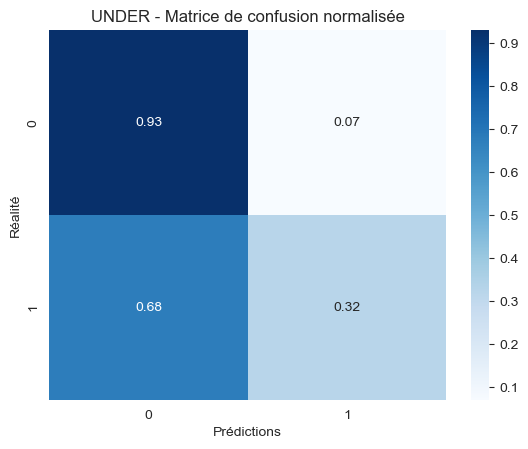

In [41]:
# Matrice de confusion normalisée
cm_normalized = confusion_matrix(y_test, y_pred_best, normalize='true')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title(f'{best_model_name.upper()} - Matrice de confusion normalisée')
plt.show()


In [49]:
import joblib

filename = 'Perceptron.sav'
joblib.dump(best_model, filename)

['Perceptron.sav']

In [44]:
pcp_model = joblib.load(filename)
print(pcp_model.score(X_test, y_test))

0.8010745086950375


In [45]:
# Let's use the first X_test record as new data
X_test[:1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
103886,624,Spain,Male,60.0,10,0.0,2,1.0,1.0,66795.78


In [46]:
pred_new = pcp_model.predict(X_test[:1])

In [47]:
print(f"Predicted classes: {pred_new}")
print(f"Actual Labels: {list(y_test[:1])}")

Predicted classes: [0]
Actual Labels: [0]


## XGBoost

In [76]:
# Pipeline par type de re-sampling
resampling_methods = {
    'over': ImbPipeline([
        ('preprocess', preprocess),
        ('smote', SMOTE(random_state=42)),
        ('xgbclassifier', XGBClassifier())
    ]),
    'under': ImbPipeline([
        ('preprocess', preprocess),
        ('under', RandomUnderSampler(random_state=42)),
        ('xgbclassifier', XGBClassifier())
    ]),
    'combined': ImbPipeline([
        ('preprocess', preprocess),
        ('smoteenn', SMOTEENN(random_state=42)),
        ('xgbclassifier', XGBClassifier())
    ])
}

### Optimisation des hyperparamètres

In [77]:
space = {
    'xgbclassifier__max_depth': hp.choice('max_depth', range(3, 11)),
    'xgbclassifier__n_estimators': hp.choice('n_estimators', range(50, 300)),
    'xgbclassifier__gamma': hp.uniform('gamma', 0, 5)
}

best_params_dict = {}

# Définir la fonction objectif pour évaluer les performances du modèle
for method, pipeline in resampling_methods.items():
# Définir la fonction objectif pour Hyperopt
    def objective(params):
        pipeline.set_params(**params)
        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        return -accuracy

    # Utiliser Hyperopt pour la recherche d'hyperparamètres
    trials = Trials()
    best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
    # Afficher les meilleurs hyperparamètres
    best_params_dict[method] = best

100%|████████████████████████████████████████████| 50/50 [2:23:57<00:00, 172.76s/trial, best loss: -0.8272707075195411]


In [78]:
# Création des pipelines avec les meilleurs hyperparamètres
pipelines = {
    'over': ImbPipeline([
        ('preprocess', preprocess),
        ('smote', SMOTE(random_state=42)),
        ('xgbclassifier', XGBClassifier(
            max_depth=best_params_dict['over']['max_depth'],
            n_estimators=best_params_dict['over']['n_estimators'],
            gamma=best_params_dict['over']['gamma']
        ))
    ]),
    'under': ImbPipeline([
        ('preprocess', preprocess),
        ('under', RandomUnderSampler(random_state=42)),
        ('xgbclassifier', XGBClassifier(
            max_depth=best_params_dict['under']['max_depth'],
            n_estimators=best_params_dict['under']['n_estimators'],
            gamma=best_params_dict['under']['gamma']
        ))
    ]),
    'combined': ImbPipeline([
        ('preprocess', preprocess),
        ('smoteenn', SMOTEENN(random_state=42)),
        ('xgbclassifier', XGBClassifier(
            max_depth=best_params_dict['combined']['max_depth'],
            n_estimators=best_params_dict['combined']['n_estimators'],
            gamma=best_params_dict['combined']['gamma']
        ))
    ])
}

In [79]:
performance_metrics = {
    'model': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'fbeta': []
}

# Entraînement et évaluation des modèles
for name, pipeline in pipelines.items():
    # Entraînement du modèle
    pipeline.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = pipeline.predict(X_test)

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fbeta = fbeta_score(y_test, y_pred, beta=1.5)


    # Stocker les métriques
    performance_metrics['model'].append(name)
    performance_metrics['accuracy'].append(accuracy)
    performance_metrics['precision'].append(precision)
    performance_metrics['recall'].append(recall)
    performance_metrics['f1_score'].append(f1)
    performance_metrics['fbeta'].append(fbeta)



### Prediction sur le modèle final

In [80]:
# Comparer les métriques pour trouver le meilleur modèle
df_performance = pd.DataFrame(performance_metrics)
best_model_name = df_performance.loc[df_performance['fbeta'].idxmax()]['model']
best_model = pipelines[best_model_name]

#print('Meilleur modèle basé sur l\'accuracy:')
best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 6, 7, 8, 9]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  [1, 2])])),
                ('under', RandomUnderSampler(random_state=42)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsam...
                               feature_types=None, gamma=4.967893656781688,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=12, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [81]:
# Prédictions avec le meilleur modèle
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]


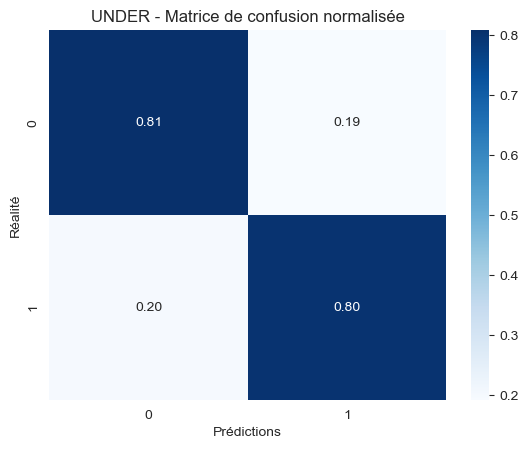

In [82]:
# Matrice de confusion normalisée
cm_normalized = confusion_matrix(y_test, y_pred_best, normalize='true')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title(f'{best_model_name.upper()} - Matrice de confusion normalisée')
plt.show()


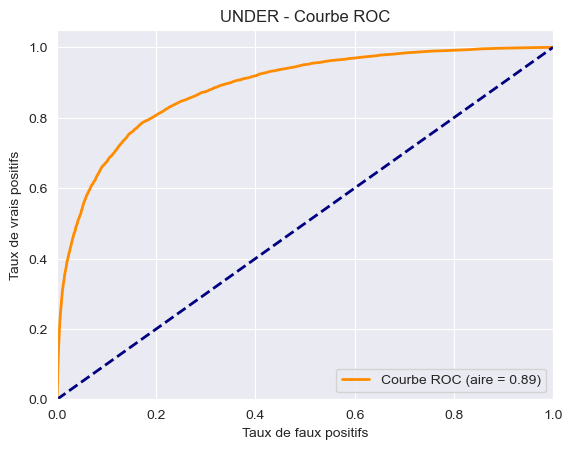

In [83]:
# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (aire = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f'{best_model_name.upper()} - Courbe ROC')
plt.legend(loc="lower right")
plt.show()


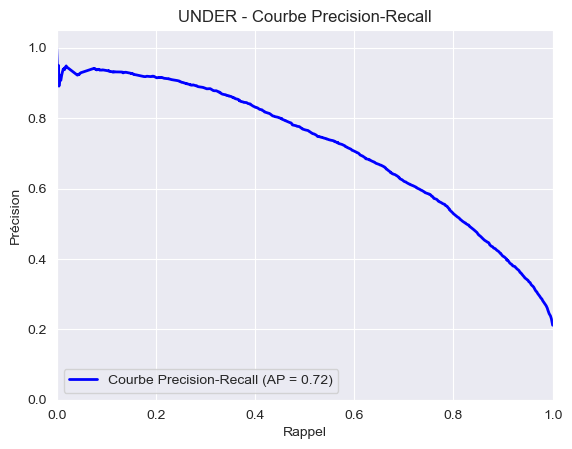

In [84]:
# Courbe Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob_best)
average_precision = average_precision_score(y_test, y_prob_best)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Courbe Precision-Recall (AP = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title(f'{best_model_name.upper()} - Courbe Precision-Recall')
plt.legend(loc="lower left")
plt.show()



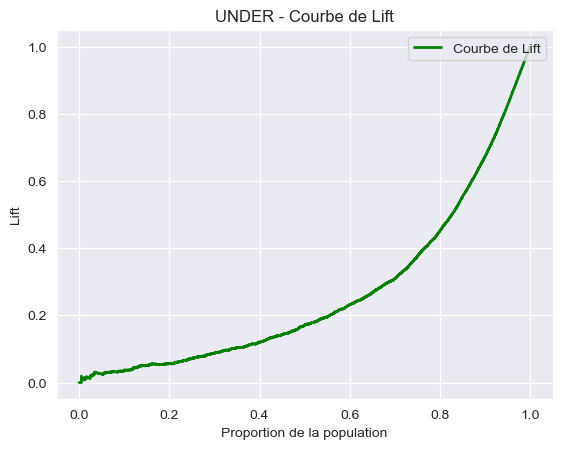

In [85]:
# Courbe de Lift
sorted_indices = np.argsort(y_prob_best)
sorted_y = y_test.iloc[sorted_indices]
cumulative_positive_rate = np.cumsum(sorted_y) / sum(sorted_y)
lift = cumulative_positive_rate / (np.arange(1, len(cumulative_positive_rate) + 1) / len(cumulative_positive_rate))
plt.figure()
plt.plot(np.arange(1, len(cumulative_positive_rate) + 1) / len(cumulative_positive_rate), lift, color='green', lw=2, label='Courbe de Lift')
plt.xlabel('Proportion de la population')
plt.ylabel('Lift')
plt.title(f'{best_model_name.upper()} - Courbe de Lift')
plt.legend(loc="upper right")
plt.show()

In [86]:
import joblib

filename = 'xgbclassifier.sav'
joblib.dump(best_model, filename)

['xgbclassifier.sav']

In [87]:
xg_model = joblib.load(filename)
print(xg_model.score(X_test, y_test))

0.806487447233948


In [88]:
# Let's use the first X_test record as new data
X_test[:1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
103886,624,Spain,Male,60.0,10,0.0,2,1.0,1.0,66795.78


In [89]:
pred_new = xg_model.predict(X_test[:1])

In [90]:
print(f"Predicted classes: {pred_new}")
print(f"Actual Labels: {list(y_test[:1])}")

Predicted classes: [0]
Actual Labels: [0]


## Random forest

In [36]:
# Pipeline par type de re-sampling
resampling_methods = {
    'over': ImbPipeline([
        ('preprocess', preprocess),
        ('smote', SMOTE(random_state=42)),
        ('RandomForestClassifier', RandomForestClassifier())
    ]),
    'under': ImbPipeline([
        ('preprocess', preprocess),
        ('under', RandomUnderSampler(random_state=42)),
        ('RandomForestClassifier', RandomForestClassifier())
    ]),
    'combined': ImbPipeline([
        ('preprocess', preprocess),
        ('smoteenn', SMOTEENN(random_state=42)),
        ('RandomForestClassifier', RandomForestClassifier())
    ])
}

### Optimisation des hyperparamètres

In [ ]:
space = {
    #'RandomForestClassifier__n_estimators': scope.int(hp.quniform('n_estimators', 100, 1000, 1)),
    #'RandomForestClassifier__max_depth': scope.int(hp.quniform('max_depth', 5, 30, 1)),
   # 'RandomForestClassifier__min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 20, 1)),
    'RandomForestClassifier__min_samples_leaf': scope.int(hp.quniform('RandomForestClassifier__min_samples_leaf', 1, 20, 1)),
    'RandomForestClassifier__max_features': hp.choice('RandomForestClassifier__max_features', ['sqrt', 'log2', None]),
    'RandomForestClassifier__bootstrap': hp.choice('RandomForestClassifier__bootstrap', [True, False]),
    #'RandomForestClassifier__criterion': hp.choice('criterion', ['gini', 'entropy'])
}
best_params_dict = {}

# Définir la fonction objectif pour évaluer les performances du modèle
for method, pipeline in resampling_methods.items():
# Définir la fonction objectif pour Hyperopt
    def objective(params):
        pipeline.set_params(**params)
        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        return -accuracy

    # Utiliser Hyperopt pour la recherche d'hyperparamètres
    trials = Trials()
    best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
    # Afficher les meilleurs hyperparamètres
    best_params_dict[method] = best

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

  6%|▌         | 3/50 [04:03<1:05:01, 83.02s/trial, best loss: -0.8350669548181212]

In [ ]:
# Création des pipelines avec les meilleurs hyperparamètres
pipelines = {
    'over': ImbPipeline([
        ('preprocess', preprocess),
        ('smote', SMOTE(random_state=42)),
        ('RandomForestClassifier', RandomForestClassifier(
            #max_depth=best_params_dict['over']['max_depth'],
            #n_estimators=best_params_dict['over']['n_estimators'],
            #min_samples_split=best_params_dict['over']['min_samples_split']
            #min_samples_leaf=[1, 20, 1][best['RandomForestClassifier__min_samples_leaf']],
            max_features=['sqrt', 'log2', None][best['RandomForestClassifier__max_features']],
            bootstrap=[True, False][best['RandomForestClassifier__bootstrap']],
            #criterion=best_params_dict['over']['criterion']
        ))
    ]),
    'under': ImbPipeline([
        ('preprocess', preprocess),
        ('under', RandomUnderSampler(random_state=42)),
        ('RandomForestClassifier', RandomForestClassifier(
            #max_depth=best_params_dict['under']['max_depth'],
            #n_estimators=best_params_dict['under']['n_estimators'],
            #min_samples_split=best_params_dict['under']['min_samples_split'],
            #min_samples_leaf=[1, 20, 1][best['RandomForestClassifier__min_samples_leaf']],
            max_features=['sqrt', 'log2', None][best['RandomForestClassifier__max_features']],
            bootstrap=[True, False][best['RandomForestClassifier__bootstrap']],
            #criterion=best_params_dict['under']['criterion']
        ))
    ]),
    'combined': ImbPipeline([
        ('preprocess', preprocess),
        ('smoteenn', SMOTEENN(random_state=42)),
        ('RandomForestClassifier', RandomForestClassifier(
            #max_depth=best_params_dict['combined']['max_depth'],
            #n_estimators=best_params_dict['combined']['n_estimators'],
            #min_samples_split=best_params_dict['combined']['min_samples_split'],
            #min_samples_leaf=[1, 20, 1][best['RandomForestClassifier__min_samples_leaf']],
            max_features=['sqrt', 'log2', None][best['RandomForestClassifier__max_features']],
            bootstrap=[True, False][best['RandomForestClassifier__bootstrap']],
            #criterion=best_params_dict['under']['criterion']
        ))
    ])
}

In [ ]:
performance_metrics = {
    'model': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'fbeta': []
}

# Entraînement et évaluation des modèles
for name, pipeline in pipelines.items():
    # Entraînement du modèle
    pipeline.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = pipeline.predict(X_test)

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fbeta = fbeta_score(y_test, y_pred, beta=1.5)


    # Stocker les métriques
    performance_metrics['model'].append(name)
    performance_metrics['accuracy'].append(accuracy)
    performance_metrics['precision'].append(precision)
    performance_metrics['recall'].append(recall)
    performance_metrics['f1_score'].append(f1)
    performance_metrics['fbeta'].append(fbeta)



### Prediction sur le modèle final

In [ ]:
# Comparer les métriques pour trouver le meilleur modèle
df_performance = pd.DataFrame(performance_metrics)
best_model_name = df_performance.loc[df_performance['fbeta'].idxmax()]['model']
best_model = pipelines[best_model_name]

#print('Meilleur modèle basé sur l\'accuracy:')
best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 6, 7, 8, 9]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  [1, 2])])),
                ('smoteenn', SMOTEENN(random_state=42)),
                ('RandomForestClassifier',
                 RandomForestClassifier(max_features=None))])

In [ ]:
# Prédictions avec le meilleur modèle
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]


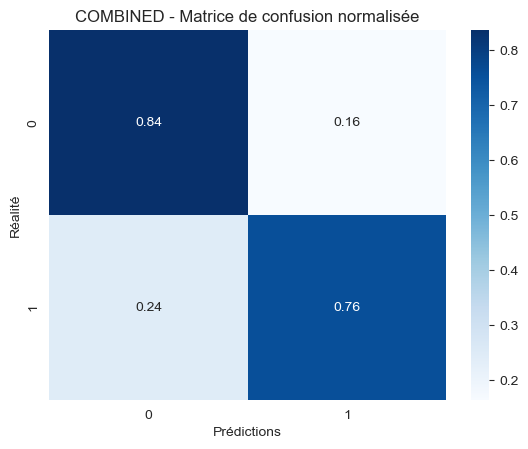

In [ ]:
# Matrice de confusion normalisée
cm_normalized = confusion_matrix(y_test, y_pred_best, normalize='true')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title(f'{best_model_name.upper()} - Matrice de confusion normalisée')
plt.show()


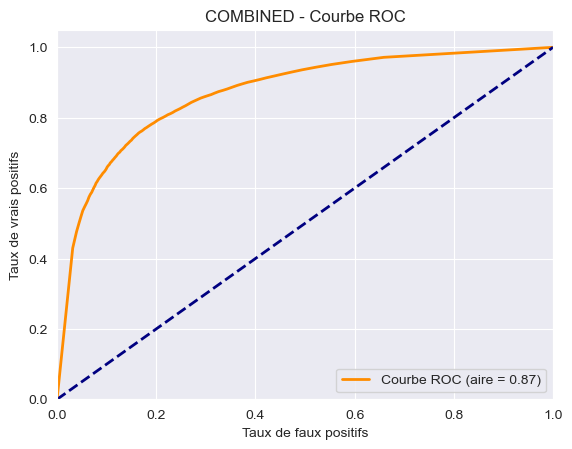

In [ ]:
# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (aire = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f'{best_model_name.upper()} - Courbe ROC')
plt.legend(loc="lower right")
plt.show()


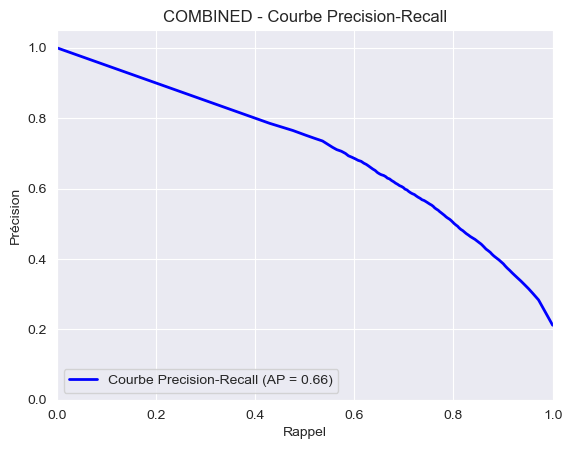

In [ ]:
# Courbe Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob_best)
average_precision = average_precision_score(y_test, y_prob_best)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Courbe Precision-Recall (AP = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title(f'{best_model_name.upper()} - Courbe Precision-Recall')
plt.legend(loc="lower left")
plt.show()



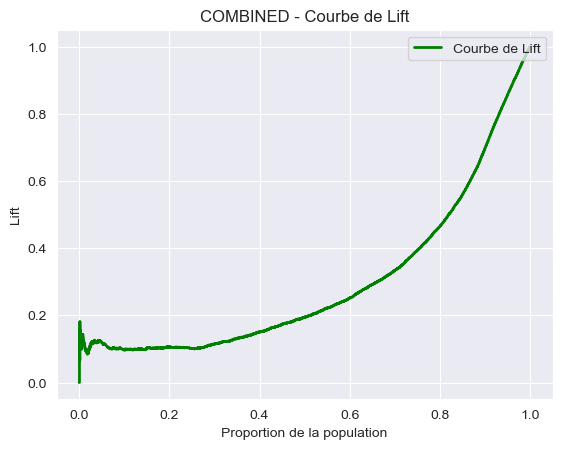

In [ ]:
# Courbe de Lift
sorted_indices = np.argsort(y_prob_best)
sorted_y = y_test.iloc[sorted_indices]
cumulative_positive_rate = np.cumsum(sorted_y) / sum(sorted_y)
lift = cumulative_positive_rate / (np.arange(1, len(cumulative_positive_rate) + 1) / len(cumulative_positive_rate))
plt.figure()
plt.plot(np.arange(1, len(cumulative_positive_rate) + 1) / len(cumulative_positive_rate), lift, color='green', lw=2, label='Courbe de Lift')
plt.xlabel('Proportion de la population')
plt.ylabel('Lift')
plt.title(f'{best_model_name.upper()} - Courbe de Lift')
plt.legend(loc="upper right")
plt.show()

In [ ]:
import pickle

# Spécifie le chemin du fichier (avec le bon séparateur)
filename = 'saved_models/RandomForest.pkl'  # Utilise '/' au lieu de '\'

# Sauvegarde du modèle avec pickle
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

['RandomForest.sav']

In [ ]:
filename = 'final_model/logistic_regression.pkl'  # Chemin vers le fichier

# Chargement du modèle
with open(filename, 'rb') as file:
    rf_model = pickle.load(file)

print(rf_model.score(X_test, y_test))

0.8190301145200056


In [68]:
# Let's use the first X_test record as new data
X_test[:1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
103886,624,Spain,Male,60.0,10,0.0,2,1.0,1.0,66795.78


In [69]:
pred_new = rf_model.predict(X_test[:1])

In [70]:
print(f"Predicted classes: {pred_new}")
print(f"Actual Labels: {list(y_test[:1])}")

Predicted classes: [0]
Actual Labels: [0]


## K plus proches voisins (KNN)

In [36]:
# Pipeline par type de re-sampling
resampling_methods = {
    'over': ImbPipeline([
        ('preprocess', preprocess),
        ('smote', SMOTE(random_state=42)),
        ('KNN', KNeighborsClassifier())
    ]),
    'under': ImbPipeline([
        ('preprocess', preprocess),
        ('under', RandomUnderSampler(random_state=42)),
        ('KNN', KNeighborsClassifier())
    ]),
    'combined': ImbPipeline([
        ('preprocess', preprocess),
        ('smoteenn', SMOTEENN(random_state=42)),
        ('KNN', KNeighborsClassifier())
    ])
}

### Optimisation des hyperparamètres

In [38]:
space = {
    'KNN__n_neighbors': scope.int(hp.quniform('KNN__n_neighbors', 1, 30, 1)),
    'KNN__weights': hp.choice('KNN__weights', ['uniform', 'distance']),
    #'KNN__algorithm': hp.choice('KNN__algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
    #'KNN__leaf_size': scope.int(hp.quniform('KNN__leaf_size', 20, 50, 1)),
    #'KNN__p': hp.choice('KNN__p', [1, 2])  # 1 for Manhattan, 2 for Euclidean
}
best_params_dict = {}

# Définir la fonction objectif pour évaluer les performances du modèle
for method, pipeline in resampling_methods.items():
# Définir la fonction objectif pour Hyperopt
    def objective(params):
        pipeline.set_params(**params)
        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        return -accuracy

    # Utiliser Hyperopt pour la recherche d'hyperparamètres
    trials = Trials()
    best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)
    # Afficher les meilleurs hyperparamètres
    best_params_dict[method] = best

100%|████████████████████████████████████████████| 50/50 [1:32:53<00:00, 111.46s/trial, best loss: -0.7897436933206762]


In [46]:
# Création des pipelines avec les meilleurs hyperparamètres
pipelines = {
    'over': ImbPipeline([
        ('preprocess', preprocess),
        ('smote', SMOTE(random_state=42)),
        ('KNN', KNeighborsClassifier(
            #n_neighbors=[best_params_dict['over']['KNN__n_neighbors']],
            weights=['uniform', 'distance'][best_params_dict['over']['KNN__weights']]
            #algorithm=best_params_dict['over']['KNN__algorithm'],
            #leaf_size=best_params_dict['over']['KNN__leaf_size'],
            #p=best_params_dict['over']['KNN__p']
        ))
    ]),
    'under': ImbPipeline([
        ('preprocess', preprocess),
        ('under', RandomUnderSampler(random_state=42)),
        ('KNN', KNeighborsClassifier(
            #n_neighbors=[best_params_dict['under']['KNN__n_neighbors']],
            weights=['uniform', 'distance'][best_params_dict['under']['KNN__weights']]
            #algorithm=best_params_dict['under']['KNN__algorithm'],
            #leaf_size=best_params_dict['under']['KNN__leaf_size'],
            #p=best_params_dict['under']['KNN__p']
        ))
    ]),
    'combined': ImbPipeline([
        ('preprocess', preprocess),
        ('smoteenn', SMOTEENN(random_state=42)),
        ('KNN', KNeighborsClassifier(
            #n_neighbors=best_params_dict['combined']['KNN__n_neighbors'],
            weights=['uniform', 'distance'][best_params_dict['combined']['KNN__weights']]
            #algorithm=best_params_dict['combined']['KNN__algorithm'],
            #leaf_size=best_params_dict['combined']['KNN__leaf_size'],
            #p=best_params_dict['combined']['KNN__p']
        ))
    ])
}

In [47]:
performance_metrics = {
    'model': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': [],
    'fbeta': []
}

# Entraînement et évaluation des modèles
for name, pipeline in pipelines.items():
    # Entraînement du modèle
    pipeline.fit(X_train, y_train)

    # Prédiction sur l'ensemble de test
    y_pred = pipeline.predict(X_test)

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fbeta = fbeta_score(y_test, y_pred, beta=1.5)


    # Stocker les métriques
    performance_metrics['model'].append(name)
    performance_metrics['accuracy'].append(accuracy)
    performance_metrics['precision'].append(precision)
    performance_metrics['recall'].append(recall)
    performance_metrics['f1_score'].append(f1)
    performance_metrics['fbeta'].append(fbeta)



### Prediction sur le modèle final

In [48]:
# Comparer les métriques pour trouver le meilleur modèle
df_performance = pd.DataFrame(performance_metrics)
best_model_name = df_performance.loc[df_performance['fbeta'].idxmax()]['model']
best_model = pipelines[best_model_name]

#print('Meilleur modèle basé sur l\'accuracy:')
best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 3, 4, 5, 6, 7, 8, 9]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  [1, 2])])),
                ('under', RandomUnderSampler(random_state=42)),
                ('KNN', KNeighborsClassifier())])

In [49]:
# Prédictions avec le meilleur modèle
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]


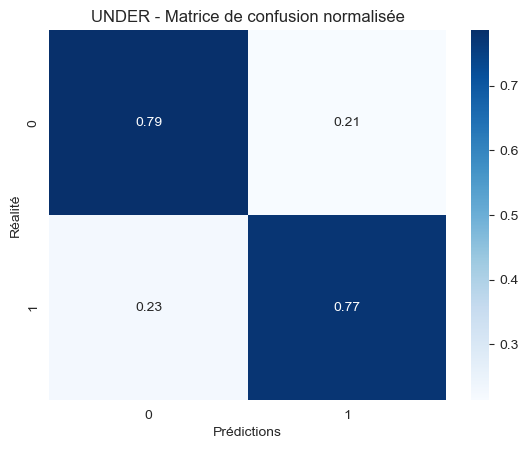

In [50]:
# Matrice de confusion normalisée
cm_normalized = confusion_matrix(y_test, y_pred_best, normalize='true')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.title(f'{best_model_name.upper()} - Matrice de confusion normalisée')
plt.show()


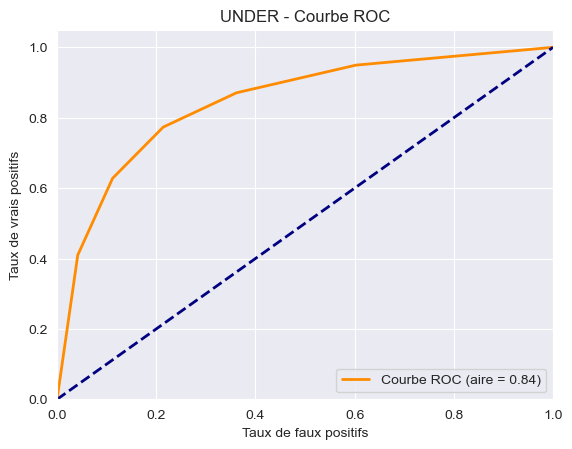

In [51]:
# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (aire = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f'{best_model_name.upper()} - Courbe ROC')
plt.legend(loc="lower right")
plt.show()


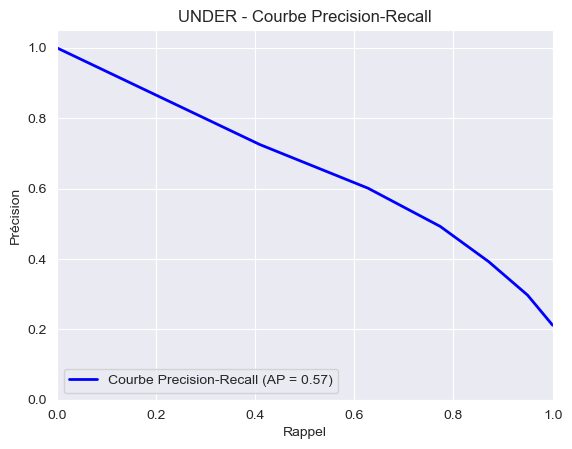

In [52]:
# Courbe Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob_best)
average_precision = average_precision_score(y_test, y_prob_best)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Courbe Precision-Recall (AP = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title(f'{best_model_name.upper()} - Courbe Precision-Recall')
plt.legend(loc="lower left")
plt.show()



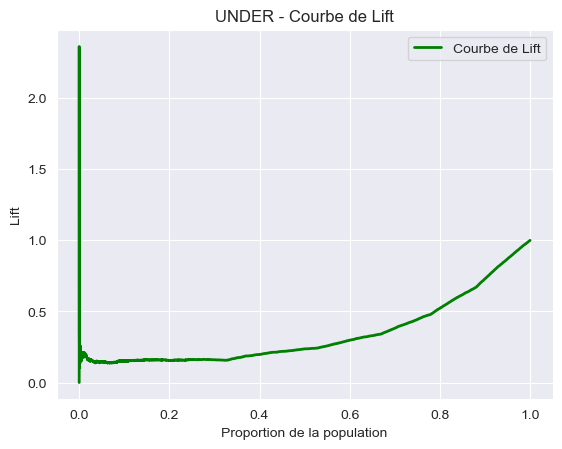

In [53]:
# Courbe de Lift
sorted_indices = np.argsort(y_prob_best)
sorted_y = y_test.iloc[sorted_indices]
cumulative_positive_rate = np.cumsum(sorted_y) / sum(sorted_y)
lift = cumulative_positive_rate / (np.arange(1, len(cumulative_positive_rate) + 1) / len(cumulative_positive_rate))
plt.figure()
plt.plot(np.arange(1, len(cumulative_positive_rate) + 1) / len(cumulative_positive_rate), lift, color='green', lw=2, label='Courbe de Lift')
plt.xlabel('Proportion de la population')
plt.ylabel('Lift')
plt.title(f'{best_model_name.upper()} - Courbe de Lift')
plt.legend(loc="upper right")
plt.show()

In [54]:
import joblib

filename = 'KNN.sav'
joblib.dump(best_model, filename)

['KNN.sav']

In [55]:
knn_model = joblib.load(filename)
print(knn_model.score(X_test, y_test))

0.7833410757205469


In [56]:
# Let's use the first X_test record as new data
X_test[:1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
103886,624,Spain,Male,60.0,10,0.0,2,1.0,1.0,66795.78


In [62]:
pred_new = knn_model.predict(X_test[:10])

In [63]:
print(f"Predicted classes: {pred_new}")
print(f"Actual Labels: {list(y_test[:10])}")

Predicted classes: [0 0 0 0 0 0 0 0 0 1]
Actual Labels: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]



# Prediction - Summary

## Dependencies

In [130]:


# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.metrics import fbeta_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from hyperopt.pyll.base import scope
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             roc_auc_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             mean_absolute_error,
                             precision_score, recall_score, f1_score, roc_curve,
                             auc, precision_recall_curve, average_precision_score
                            )
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTEENN, SMOTETomek

# store elements as dictionary keys and their counts as dictionary values
from collections import Counter


from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

# Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE


# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# store elements as dictionary keys and their counts as dictionary values
from collections import Counter

import joblib


In [131]:
from pathlib import Path

# définir le répertoire du projet contenant le dossier data/ et notebooks/
HOME = Path.cwd().parent
print(f"Home directory: {HOME}")

# définir le répertoire des données
DATA = Path(HOME, "Data")
print(f"Data directory: {DATA}")

Home directory: C:\Users\DELL\Documents\Groupe12_ML2
Data directory: C:\Users\DELL\Documents\Groupe12_ML2\Data


In [132]:
# Chargement des données
df = pd.read_csv(Path(DATA, "train.csv"))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


### Separate dataframe into separate object

In [133]:
# Object for target variable
y = df.Exited

# object for input features
X = df.drop(['Exited', 'CustomerId', 'Surname', 'id'], axis=1)

# display shapes of X and y
print(X.shape, y.shape)

(165034, 10) (165034,)


## Create a Train Test Split

In [134]:
random_state = 10

# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42,
                                                   stratify=df.Exited)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

115523 49511 115523 49511


In [135]:
# Get a Numpy representation of the DataFrame
X_train = X_train.values
X_test = X_test.values

## Load Saved Models

In [136]:
dt_model = joblib.load('DT.sav')
nb_model = joblib.load('NB.sav')
xgb_model = joblib.load('xgbclassifier.sav')
lr_model = joblib.load('logistic_regression.sav')
rf_model = joblib.load('RandomForest.sav')
#svm_model = joblib.load('SVM.sav')
knn_model = joblib.load('KNN.sav')
#lgbm_model = joblib.load('LGBM.sav')
pcp_model = joblib.load('Perceptron.sav')



**Dictionary `'models'`**

We are going to create the dictionary `models` with names of all models. We will be using it later for plotting and displaying results of the models.

In [137]:
# Create models dictionary, it will be needed for ploting
models = {
    'dt' : 'Decision Tree',
    'nb': 'Naive Bayes',
    'knn' : 'K-nearest Neighbors',
    'lr' : 'Logistic Regression',
    'rf' : 'Random Forest',
    #'svm' : 'Support Vector Machine (SVM)',
    'xgb' : 'XGBoost',
    #'lgbm' : 'LightGBM',
    'pcp' : 'Perceptron'
}

**Dictionary `'loaded_models'`**

The dictionary `loaded_models` with names of all loaded models. We will be using it later for plotting and displaying results of the models.

In [138]:
# Dictionary of all loaded models
loaded_models = {
    'dt' : dt_model,
    'nb': nb_model,
    'knn': knn_model,
    'lr' : lr_model,
    'rf' : rf_model,
    #'svm' : svm_model,
    'xgb' : xgb_model,
    #'lgbm' : lgbm_model,
    'pcp' : pcp_model
}

'target_names' variable will be used later for printing evaluation results.

In [139]:
target_names = ['Stay', 'Exit']

### Helper Functions

In [140]:
def evaluation(fit_models):
    lst = []
    for name, model in fit_models.items():
        pred = model.predict(X_test)
        lst.append([name,
                    precision_score(y_test, pred, average='macro'),
                    recall_score(y_test, pred, average='macro'),
                    f1_score(y_test, pred, average='macro'),
                    fbeta_score(y_test, pred, average='macro', beta=2),
                    accuracy_score(y_test, pred)]),
            
 
    eval_df = pd.DataFrame(lst, columns=['model', 'precision', 'recall', 'f1_macro', 'f2_macro', 'accuracy'])
    eval_df.set_index('model', inplace = True)
    return eval_df

**Function pour sortir les matrices de confusion et les classification report.**


In [141]:
def class_rep_cm(fit_models, models, model_id):
    # Predict classes using model_id
    pred = fit_models[model_id].predict(X_test)
    print()
    print('\t', models[model_id])
    print('\t', '='*len(models[model_id]))

    # Display confusion matrix for y_test and pred
    conf_df = pd.DataFrame(confusion_matrix(y_test, pred), columns=target_names, index=target_names)
    conf_df.index.name = 'True Labels'
    conf_df = conf_df.rename_axis('Predicted Labels', axis='columns')
    display(conf_df)

    # Display classification report
    print()
    print(classification_report(y_test, pred, target_names=target_names))


**Fonctions pour les heatmaps issus de la matrice de confusion normalisée et sans normalisation**


In [142]:
def plot_conf_mat_w_and_wo_norm(fit_models, models, model_id, color):
    # Plot confusion matrix heatmaps
    pred = fit_models[model_id].predict(X_test)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    f.suptitle(models[model_id], fontsize=14)
    f.subplots_adjust(top=0.85, wspace=0.3)

    # confusion matrix without normalization
    mat = confusion_matrix(y_test, pred)
    sns.heatmap(mat,
                annot=True,
                annot_kws=dict(fontsize=14),
                fmt='d',
                cbar=True,
                square=True,
                cmap=color,
                ax=ax1)

    ax1.set_xticklabels(labels=target_names)
    ax1.set_yticklabels(labels=target_names, va='center')
    ax1.set_title('Confusion Matrix w/o Normalization')
    ax1.set_xlabel('Predicted Label', size=12)
    ax1.set_ylabel('True Label', size=12)

    # normalized confusion matrix
    matn = mat / mat.sum(axis=1)[:, np.newaxis]
    sns.heatmap(matn,
                annot=True,
                annot_kws=dict(fontsize=14),
                fmt='.2f',
                cbar=True,
                square=True,
                cmap=color,
                vmin = 0,
                vmax = 1,
                ax=ax2)

    ax2.set_xticklabels(labels=target_names)
    ax2.set_yticklabels(labels=target_names, va='center')
    ax2.set_title('Normalized Confusion Matrix')
    ax2.set_xlabel('Predicted Label', size=12)
    ax2.set_ylabel('Vrai Label', size=12)

    plt.show()

**Fonctions pour les heatmaps issus de la matrice de confusion normalisée**


In [143]:
def plot_norm_conf_matrices(fit_models, models, color):
    # Prepare lists of coordinates for axes
    lt = []  # list for full subplots
    ltd = []  # list for empty subplots
    col = 2  # number of columns
    n_mod = len(fit_models)  # number of fitted models

    # Number of rows
    row = - (n_mod // -col)

    # Create lists of coordinates for full and empty subplots
    for r in range(row):
        for c in range(col):
            if n_mod >= (r + 1) * (c + 1):
                lt.append([r, c])
            else:
                ltd.append([r, c])

    # Create figure and subplots
    figs_y = row * 4  # y size
    f, axs = plt.subplots(row, col, figsize=(10, figs_y))
    f.suptitle('Normalized Confusion Matrices', fontsize=14)
    f.subplots_adjust(top=0.94, wspace=0.90, hspace=0.2)

    # Reshape axes; needed in case of only 1 row
    axs = axs.reshape(row,-col)

    # Loop to delete N last empty subplots (if any)
    for n in range(len(ltd)):
        r = ltd[n][0]
        c = ltd[n][1]
        f.delaxes(ax= axs[r, c])

    # Loop to plot all full subplots
    i = 0
    # Loop for each fitted model
    for id, model in fit_models.items():
        pred = model.predict(X_test)
        name = models[id]
        r = lt[i][0]
        c = lt[i][1]
        i += 1

        mat = confusion_matrix(y_test, pred)
        # normalized confusion matrix
        matn = mat / mat.sum(axis=1)[:, np.newaxis]

        ax = axs[r, c]
        sns.heatmap(matn,
                    annot=True,
                    annot_kws=dict(fontsize=14),
                    fmt='.2f',
                    cbar=False,
                    square=True,
                    cmap=color,
                    vmin = 0,
                    vmax = 1,
                    #cbar_kws = {'shrink' : 0.85},
                    ax=ax)

        ax.set_xticklabels(labels=target_names)
        ax.set_yticklabels(labels=target_names, va='center')
        ax.set_title(name)
        ax.set_xlabel('Predicted Label', size=12)
        ax.set_ylabel('True Label', size=12)

    plt.show()

### Display evaluation metrics

In [144]:
# Display evaluation metrics
metrics=evaluation(loaded_models)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature n

In [145]:
metrics

,precision,recall,f1_macro,f2_macro,accuracy
model,,,,,
dt,0.659657,0.706353,0.670729,0.688337,0.744663
nb,0.694022,0.749867,0.708978,0.729532,0.774899
knn,0.710264,0.779665,0.726431,0.752480,0.783341
lr,0.683056,0.746941,0.695166,0.719852,0.755913
rf,0.740130,0.795943,0.758982,0.778492,0.819030
xgb,0.732978,0.804156,0.752248,0.778295,0.806487
pcp,0.693766,0.626023,0.643716,0.630490,0.801075


### Display confusion matrix and classification report

In [146]:
# Display classification report and confusion matrix for all models

for model in models.keys():
    class_rep_cm(loaded_models, models, model)


	 Decision Tree


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


Predicted Labels,Stay,Exit
True Labels,,
Stay,30165,8870
Exit,3772,6704



              precision    recall  f1-score   support

        Stay       0.89      0.77      0.83     39035
        Exit       0.43      0.64      0.51     10476

    accuracy                           0.74     49511
   macro avg       0.66      0.71      0.67     49511
weighted avg       0.79      0.74      0.76     49511


	 Naive Bayes


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


Predicted Labels,Stay,Exit
True Labels,,
Stay,30965,8070
Exit,3075,7401



              precision    recall  f1-score   support

        Stay       0.91      0.79      0.85     39035
        Exit       0.48      0.71      0.57     10476

    accuracy                           0.77     49511
   macro avg       0.69      0.75      0.71     49511
weighted avg       0.82      0.77      0.79     49511



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(



	 K-nearest Neighbors


Predicted Labels,Stay,Exit
True Labels,,
Stay,30683,8352
Exit,2375,8101



              precision    recall  f1-score   support

        Stay       0.93      0.79      0.85     39035
        Exit       0.49      0.77      0.60     10476

    accuracy                           0.78     49511
   macro avg       0.71      0.78      0.73     49511
weighted avg       0.84      0.78      0.80     49511


	 Logistic Regression


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


Predicted Labels,Stay,Exit
True Labels,,
Stay,29764,9271
Exit,2814,7662



              precision    recall  f1-score   support

        Stay       0.91      0.76      0.83     39035
        Exit       0.45      0.73      0.56     10476

    accuracy                           0.76     49511
   macro avg       0.68      0.75      0.70     49511
weighted avg       0.82      0.76      0.77     49511



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(



	 Random Forest


Predicted Labels,Stay,Exit
True Labels,,
Stay,32632,6403
Exit,2557,7919



              precision    recall  f1-score   support

        Stay       0.93      0.84      0.88     39035
        Exit       0.55      0.76      0.64     10476

    accuracy                           0.82     49511
   macro avg       0.74      0.80      0.76     49511
weighted avg       0.85      0.82      0.83     49511


	 XGBoost


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


Predicted Labels,Stay,Exit
True Labels,,
Stay,31548,7487
Exit,2094,8382



              precision    recall  f1-score   support

        Stay       0.94      0.81      0.87     39035
        Exit       0.53      0.80      0.64     10476

    accuracy                           0.81     49511
   macro avg       0.73      0.80      0.75     49511
weighted avg       0.85      0.81      0.82     49511


	 Perceptron


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


Predicted Labels,Stay,Exit
True Labels,,
Stay,36283,2752
Exit,7097,3379



              precision    recall  f1-score   support

        Stay       0.84      0.93      0.88     39035
        Exit       0.55      0.32      0.41     10476

    accuracy                           0.80     49511
   macro avg       0.69      0.63      0.64     49511
weighted avg       0.78      0.80      0.78     49511



### Plot normalized confusion matrix heatmaps for all loaded models

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature n

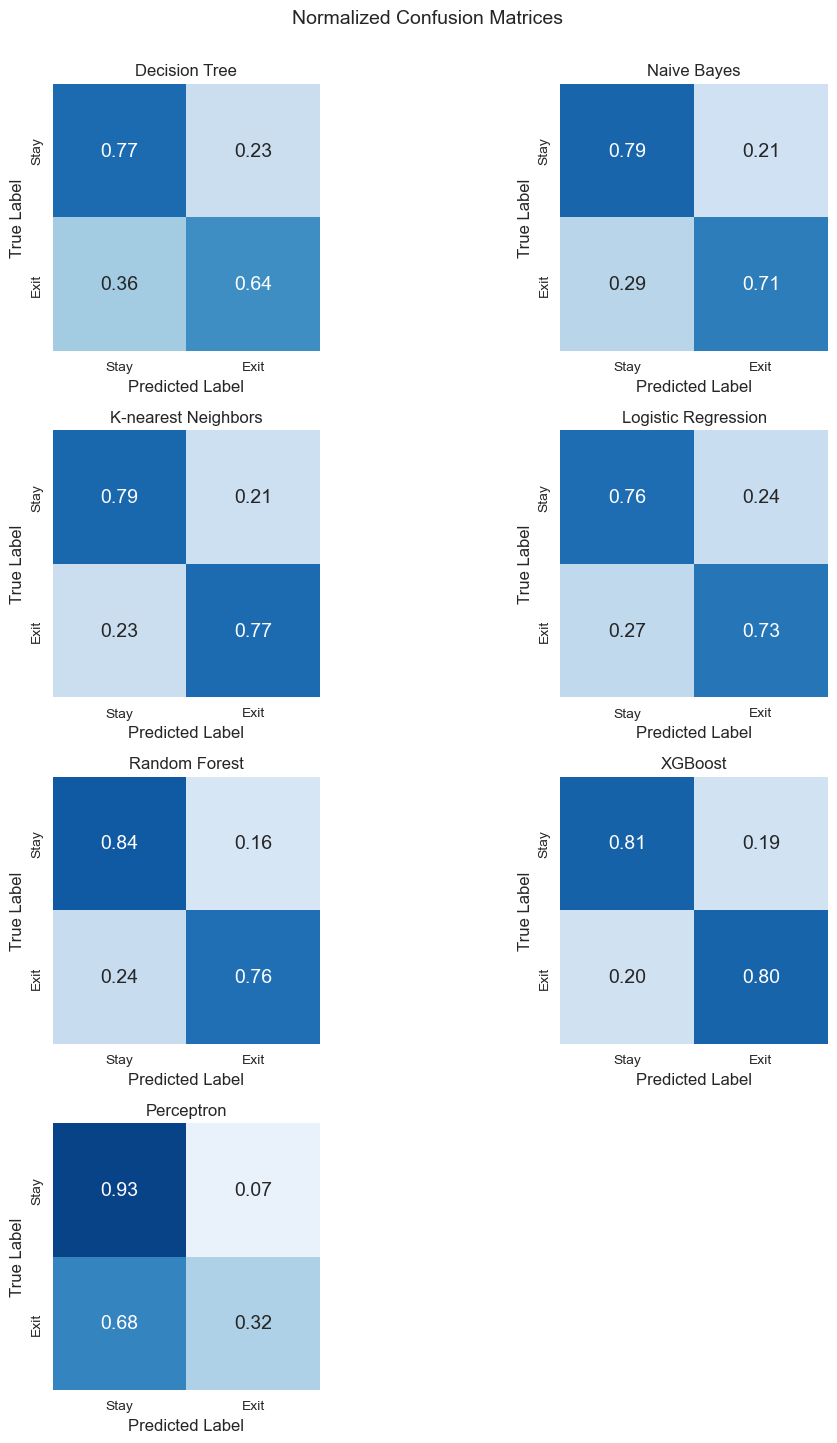

In [147]:
# Plot all confusion matrices
plot_norm_conf_matrices(loaded_models, models, 'Blues')

In [148]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,precision,recall,f1_macro,f2_macro,accuracy
model,,,,,
dt,0.659657,0.706353,0.670729,0.688337,0.744663
nb,0.694022,0.749867,0.708978,0.729532,0.774899
knn,0.710264,0.779665,0.726431,0.752480,0.783341
lr,0.683056,0.746941,0.695166,0.719852,0.755913
rf,0.740130,0.795943,0.758982,0.778492,0.819030
xgb,0.732978,0.804156,0.752248,0.778295,0.806487
pcp,0.693766,0.626023,0.643716,0.630490,0.801075


In [150]:

# Trouver le modèle avec la plus grande valeur pour l'accuracy et le recall à la fois
best_model = metrics_df[(metrics_df['accuracy'] == metrics_df['accuracy'].max()) & (metrics_df['f2_macro'] == metrics_df['f2_macro'].max())]

# Afficher le meilleur modèle
print("Meilleur modèle (selon l'accuracy et le f2_score):")
print(best_model)

Meilleur modèle (selon l'accuracy et le f2_score):
       precision    recall  f1_macro  f2_macro  accuracy
model                                                   
rf       0.74013  0.795943  0.758982  0.778492   0.81903


<h2 style="text-align:left;color:red;font-size:20px;font-family:ALGERIAN">Meilleur modèle : Random Forest qvec un recall de 79,6% et un Accuracy de 81,9%</h2>